In [1]:
!git clone https://github.com/ywang530/ESPCN.git

Cloning into 'ESPCN'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1963 (delta 10), reused 13 (delta 3), pack-reused 1936
Receiving objects: 100% (1963/1963), 151.10 MiB | 21.61 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [2]:
!ls

ESPCN  sample_data


In [3]:
cd ESPCN/

/content/ESPCN


In [4]:
!ls

 analysis		  ESPCN_model.py   results		     train.py
 data			  LICENSE	  'Results Analysis.ipynb'   utils.py
 data_loader.py		  __pycache__	   saved_models
 data_pre_processing.py   README.md	   test.py


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 1. Read in all results

In [6]:
# read in Eval_PSNR
Eval_PSNR_X2 = pd.read_csv('results/Eval_PSNR_X2.csv')
Eval_PSNR_X3 = pd.read_csv('results/Eval_PSNR_X3.csv')
Eval_PSNR_X4 = pd.read_csv('results/Eval_PSNR_X4.csv')
Eval_PSNR_X5 = pd.read_csv('results/Eval_PSNR_X5.csv')
Eval_PSNR_X6 = pd.read_csv('results/Eval_PSNR_X6.csv')
Eval_PSNR_X7 = pd.read_csv('results/Eval_PSNR_X7.csv')
Eval_PSNR_X8 = pd.read_csv('results/Eval_PSNR_X8.csv')
Eval_PSNR = [Eval_PSNR_X2, Eval_PSNR_X3, Eval_PSNR_X4, Eval_PSNR_X5, Eval_PSNR_X6, Eval_PSNR_X7, Eval_PSNR_X8]

# read in train_losses
train_loss_X2 = pd.read_csv('results/train_loss_X2.csv')
train_loss_X3 = pd.read_csv('results/train_loss_X3.csv')
train_loss_X4 = pd.read_csv('results/train_loss_X4.csv')
train_loss_X5 = pd.read_csv('results/train_loss_X5.csv')
train_loss_X6 = pd.read_csv('results/train_loss_X6.csv')
train_loss_X7 = pd.read_csv('results/train_loss_X7.csv')
train_loss_X8 = pd.read_csv('results/train_loss_X8.csv')
train_loss = [train_loss_X2, train_loss_X3, train_loss_X4, train_loss_X5, train_loss_X6, train_loss_X7, train_loss_X8]

# read in Set5_ESPCN_BICUBIC_Comparison
Set5_Comparison_X2 = pd.read_csv('results/Set5_ESPCN_BICUBIC_Comparison_X2.csv')
Set5_Comparison_X3 = pd.read_csv('results/Set5_ESPCN_BICUBIC_Comparison_X3.csv')
Set5_Comparison_X4 = pd.read_csv('results/Set5_ESPCN_BICUBIC_Comparison_X4.csv')
Set5_Comparison_X5 = pd.read_csv('results/Set5_ESPCN_BICUBIC_Comparison_X5.csv')
Set5_Comparison_X6 = pd.read_csv('results/Set5_ESPCN_BICUBIC_Comparison_X6.csv')
Set5_Comparison_X7 = pd.read_csv('results/Set5_ESPCN_BICUBIC_Comparison_X7.csv')
Set5_Comparison_X8 = pd.read_csv('results/Set5_ESPCN_BICUBIC_Comparison_X8.csv')
Set5_Comparison = [Set5_Comparison_X2, Set5_Comparison_X3, Set5_Comparison_X4, Set5_Comparison_X5, Set5_Comparison_X6, Set5_Comparison_X7, Set5_Comparison_X8]

# read in Set14_ESPCN_BICUBIC_Comparison
Set14_Comparison_X2 = pd.read_csv('results/Set14_ESPCN_BICUBIC_Comparison_X2.csv')
Set14_Comparison_X3 = pd.read_csv('results/Set14_ESPCN_BICUBIC_Comparison_X3.csv')
Set14_Comparison_X4 = pd.read_csv('results/Set14_ESPCN_BICUBIC_Comparison_X4.csv')
Set14_Comparison_X5 = pd.read_csv('results/Set14_ESPCN_BICUBIC_Comparison_X5.csv')
Set14_Comparison_X6 = pd.read_csv('results/Set14_ESPCN_BICUBIC_Comparison_X6.csv')
Set14_Comparison_X7 = pd.read_csv('results/Set14_ESPCN_BICUBIC_Comparison_X7.csv')
Set14_Comparison_X8 = pd.read_csv('results/Set14_ESPCN_BICUBIC_Comparison_X8.csv')
Set14_Comparison = [Set14_Comparison_X2, Set14_Comparison_X3, Set14_Comparison_X4, Set14_Comparison_X5, Set14_Comparison_X6, Set14_Comparison_X7, Set14_Comparison_X8]

# read in celeba_ESPCN_BICUBIC_Comparison
celeba_Comparison_X2 = pd.read_csv('results/celeba_ESPCN_BICUBIC_Comparison_X2.csv')
celeba_Comparison_X3 = pd.read_csv('results/celeba_ESPCN_BICUBIC_Comparison_X3.csv')
celeba_Comparison_X4 = pd.read_csv('results/celeba_ESPCN_BICUBIC_Comparison_X4.csv')
celeba_Comparison_X5 = pd.read_csv('results/celeba_ESPCN_BICUBIC_Comparison_X5.csv')
celeba_Comparison_X6 = pd.read_csv('results/celeba_ESPCN_BICUBIC_Comparison_X6.csv')
celeba_Comparison_X7 = pd.read_csv('results/celeba_ESPCN_BICUBIC_Comparison_X7.csv')
celeba_Comparison_X8 = pd.read_csv('results/celeba_ESPCN_BICUBIC_Comparison_X8.csv')
celeba_Comparison = [celeba_Comparison_X2, celeba_Comparison_X3, celeba_Comparison_X4, celeba_Comparison_X5, celeba_Comparison_X6, celeba_Comparison_X7, celeba_Comparison_X8]

## 2. Eval PSNR and Train Loss Analysis

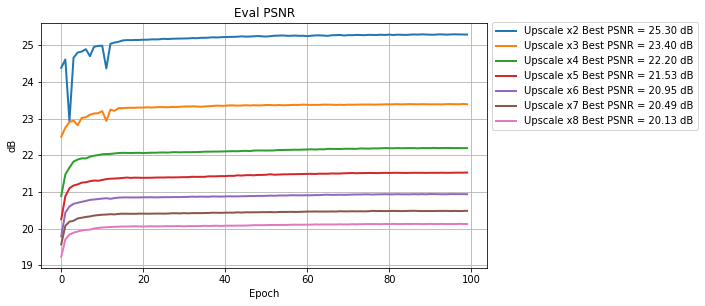

In [7]:
plt.figure(figsize=(8,4.5));
plt.title('Eval PSNR');
plt.xlabel('Epoch');
plt.ylabel('dB');
plt.grid(True)
for i, df in enumerate(Eval_PSNR):
    label = 'Upscale x' + str(i+2) + ' Best PSNR = ' + '{:.2f} dB'.format(max(df['Eval PSNR']))
    plt.plot(df['Eval PSNR'], label=label, linewidth=2)
    
    
# plt.yticks(np.arange(19,26,0.5))
plt.legend(bbox_to_anchor=(1,1.025), loc='upper left');

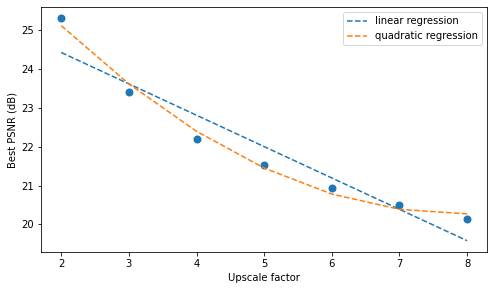

In [8]:
best_PSNR = {}
i = 2
for df in Eval_PSNR:
    name = 'x' + str(i)
    best_PSNR[name] = max(df['Eval PSNR'])
    i += 1
    
x = np.arange(2,9)
y = list(best_PSNR.values())
m, b = np.polyfit(x,y,1)
m2, m1, b1 = np.polyfit(x,y,2)

plt.figure(figsize=(8,4.5))
plt.xlabel('Upscale factor')
plt.ylabel('Best PSNR (dB)')
plt.scatter(x,y, lw=2)
plt.plot(x, m*x + b, linestyle='--', label = 'linear regression')
plt.plot(x, m2*(x**2) + m1*x +b1, linestyle='--', label = 'quadratic regression')
plt.legend();

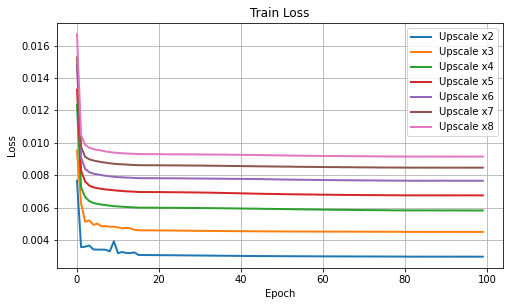

In [9]:
plt.figure(figsize=(8,4.5));
plt.title('Train Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.grid(True)
for i, df in enumerate(train_loss):
    label = 'Upscale x' + str(i+2)
    plt.plot(df['train_loss'], label=label, linewidth=2)
    
plt.legend(loc='best');

## 3. Results comparison between ESPCN and Bicubic Interpolation
### 3.1 Set 5

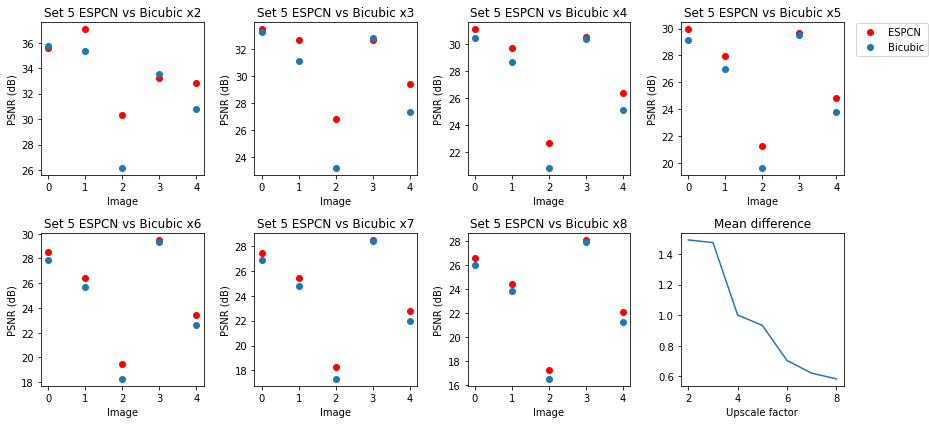

In [10]:
fig, ax = plt.subplots(2,4, figsize=(12,6))
i = 0
j = 0
scale = 2
mean_dif = []
labels = ['ESPCN', 'Bicubic']
for df in (Set5_Comparison):
    x = np.arange(len(df))
    y =  list(df['ESPCN PSNR'])
    y2 = list(df['BICUBIC PSNR'])
    mean_dif.append(np.mean(df['ESPCN PSNR']-df['BICUBIC PSNR']))
    if(j == 4):
        i = 1
        j = 0
    
    title = 'Set 5 ESPCN vs Bicubic x' + str(scale)
    ax[i,j].set_title(title)
    ax[i,j].set_xlabel('Image')
    ax[i,j].set_ylabel('PSNR (dB)')
    ax[i,j].scatter(x,y, label = 'ESPCN', color = 'red')
    ax[i,j].scatter(x,y2, label = 'Bicubic')
    j += 1
    scale += 1
    
ax[1,3].set_title('Mean difference')
ax[1,3].set_xlabel('Upscale factor')
ax[1,3].plot(np.arange(2,9), mean_dif)
plt.tight_layout()
handles, labels = ax[0,3].get_legend_handles_labels();
fig.legend(handles, labels, bbox_to_anchor=(1.08,0.94), loc='upper right');

### 3.2 Set 14

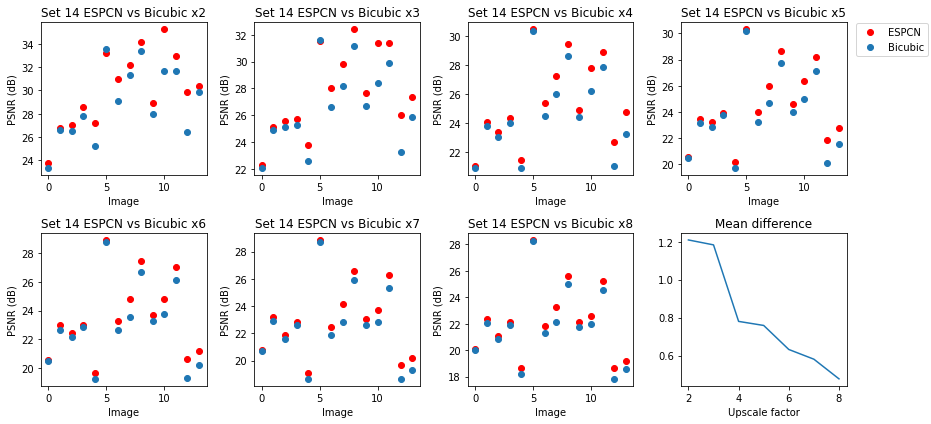

In [11]:
fig, ax = plt.subplots(2,4, figsize=(12,6))
i = 0
j = 0
scale = 2
mean_dif = []
for df in (Set14_Comparison):
    x = np.arange(len(df))
    y =  list(df['ESPCN PSNR'])
    y2 = list(df['BICUBIC PSNR'])
    mean_dif.append(np.mean(df['ESPCN PSNR']-df['BICUBIC PSNR']))
    if(j == 4):
        i = 1
        j = 0
    
    title = 'Set 14 ESPCN vs Bicubic x' + str(scale)
    ax[i,j].set_xlabel('Image')
    ax[i,j].set_ylabel('PSNR (dB)')
    ax[i,j].set_title(title)
    ax[i,j].scatter(x,y, label = 'ESPCN', color = 'red')
    ax[i,j].scatter(x,y2, label = 'Bicubic')
    j += 1
    scale += 1
    
plt.tight_layout()
ax[1,3].set_title('Mean difference')
ax[1,3].set_xlabel('Upscale factor')
ax[1,3].plot(np.arange(2,9), mean_dif)
plt.tight_layout()
handles, labels = ax[0,3].get_legend_handles_labels();
fig.legend(handles, labels, bbox_to_anchor=(1.08,0.94), loc='upper right');


### 3.3 Celeba

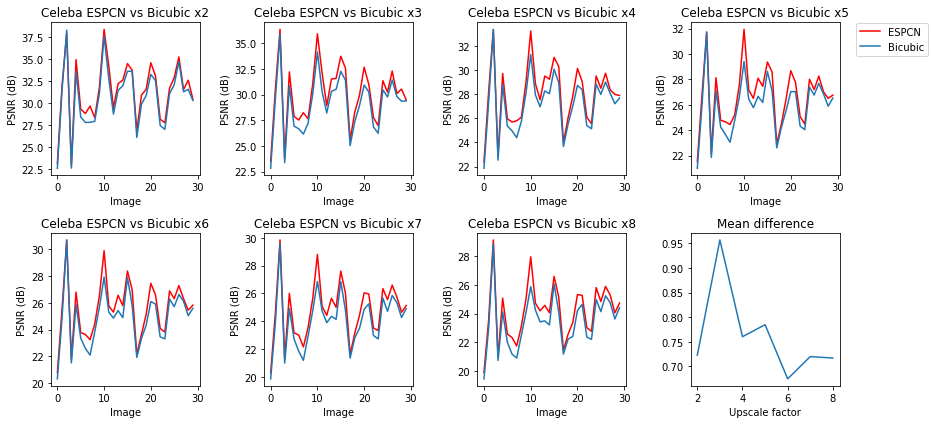

In [12]:
fig, ax = plt.subplots(2,4, figsize=(12,6))
i = 0
j = 0
scale = 2
mean_dif = []
for df in (celeba_Comparison):
    x = np.arange(len(df))
    y =  list(df['ESPCN PSNR'])
    y2 = list(df['BICUBIC PSNR'])
    mean_dif.append(np.mean(df['ESPCN PSNR']-df['BICUBIC PSNR']))
    if(j == 4):
        i = 1
        j = 0
    
    title = 'Celeba ESPCN vs Bicubic x' + str(scale)
    ax[i,j].set_xlabel('Image')
    ax[i,j].set_ylabel('PSNR (dB)')
    ax[i,j].set_title(title)
    ax[i,j].plot(x,y, label = 'ESPCN', color = 'red')
    ax[i,j].plot(x,y2, label = 'Bicubic')
    j += 1
    scale += 1
    
plt.tight_layout()
ax[1,3].set_title('Mean difference')
ax[1,3].set_xlabel('Upscale factor')
ax[1,3].plot(np.arange(2,9), mean_dif)
plt.tight_layout()
handles, labels = ax[0,3].get_legend_handles_labels();
fig.legend(handles, labels, bbox_to_anchor=(1.08,0.94), loc='upper right');


In [13]:
m2

0.1379487400963211

In [14]:
m1

-2.1860385849362443

In [15]:
b1

28.931318146841875

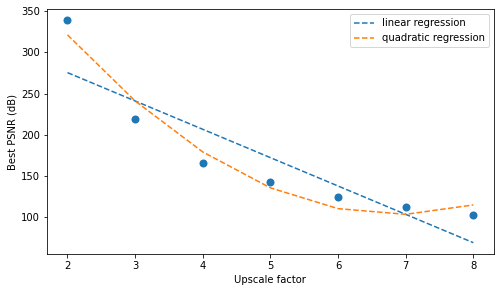

In [16]:
best_PSNR = {}
i = 2
for df in Eval_PSNR:
    name = 'x' + str(i)
    best_PSNR[name] = 10**(max(df['Eval PSNR'])/10)
    i += 1
    
x = np.arange(2,9)
y = list(best_PSNR.values())
m, b = np.polyfit(x,y,1)
m2, m1, b1 = np.polyfit(x,y,2)

plt.figure(figsize=(8,4.5))
plt.xlabel('Upscale factor')
plt.ylabel('Best PSNR (dB)')
plt.scatter(x,y, lw=2)
plt.plot(x, m*x + b, linestyle='--', label = 'linear regression')
plt.plot(x, m2*(x**2) + m1*x +b1, linestyle='--', label = 'quadratic regression')
plt.legend();

In [17]:
m2

9.159630531259015

In [18]:
m1

-125.98983796697296